<a href="https://colab.research.google.com/github/Vaibhav212000/ML-and-Deep-Learning-Projects/blob/main/Yolo11train_custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Jul  4 12:37:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip list | grep torch

torch                                 2.6.0+cu124
torchao                               0.10.0
torchaudio                            2.6.0+cu124
torchdata                             0.11.0
torchsummary                          1.5.1
torchtune                             0.6.1
torchvision                           0.21.0+cu124


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/112.6 GB disk)


In [ ]:
# Make sure the datasets folder is created
!mkdir -p /content/datasets

# Install roboflow (if not already installed)
!pip install -q roboflow

# Change directory
%cd /content/datasets

# Roboflow API setup
from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_AF = userdata.get('ROBOFLOW_AF')  # Make sure your API key is correctly stored
rf = Roboflow(api_key=ROBOFLOW_AF)
project = rf.workspace("vaibhav-nqnfb").project("tft-id-v2jvy")
version = project.version(1)
dataset = version.download("yolov11")  # This will also extract to /content/datasets

print("Dataset location:", dataset.location)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.1 MB/s eta 0:00:00
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TFT-ID-1 in yolov11:: 100%|██████████| 14982/14982 [00:19<00:00, 767.04it/s] 


Dataset location: /content/datasets/TFT-ID-1


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="NpN7TTLmVg7pBpwTMZrt")

# Your workspace and project
project = rf.workspace("huyifei").project("tft-id")

# Dataset version and format
version = project.version(1)
dataset = version.download("yolov11")

print("Dataset downloaded to:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to: /content/datasets/TFT-ID-1


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# Go to working directory (optional)
%cd /content/datasets

# Train YOLO model using dataset path
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=10 batch=16 imgsz=640 plots=True


/content/datasets
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/TFT-ID-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

In [ ]:
!ls /content/datasets/runs/detect/train2


args.yaml			 labels_correlogram.jpg  val_batch0_labels.jpg
BoxF1_curve.png			 labels.jpg		 val_batch0_pred.jpg
BoxP_curve.png			 results.csv		 val_batch1_labels.jpg
BoxPR_curve.png			 results.png		 val_batch1_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1.jpg	 val_batch2_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 weights


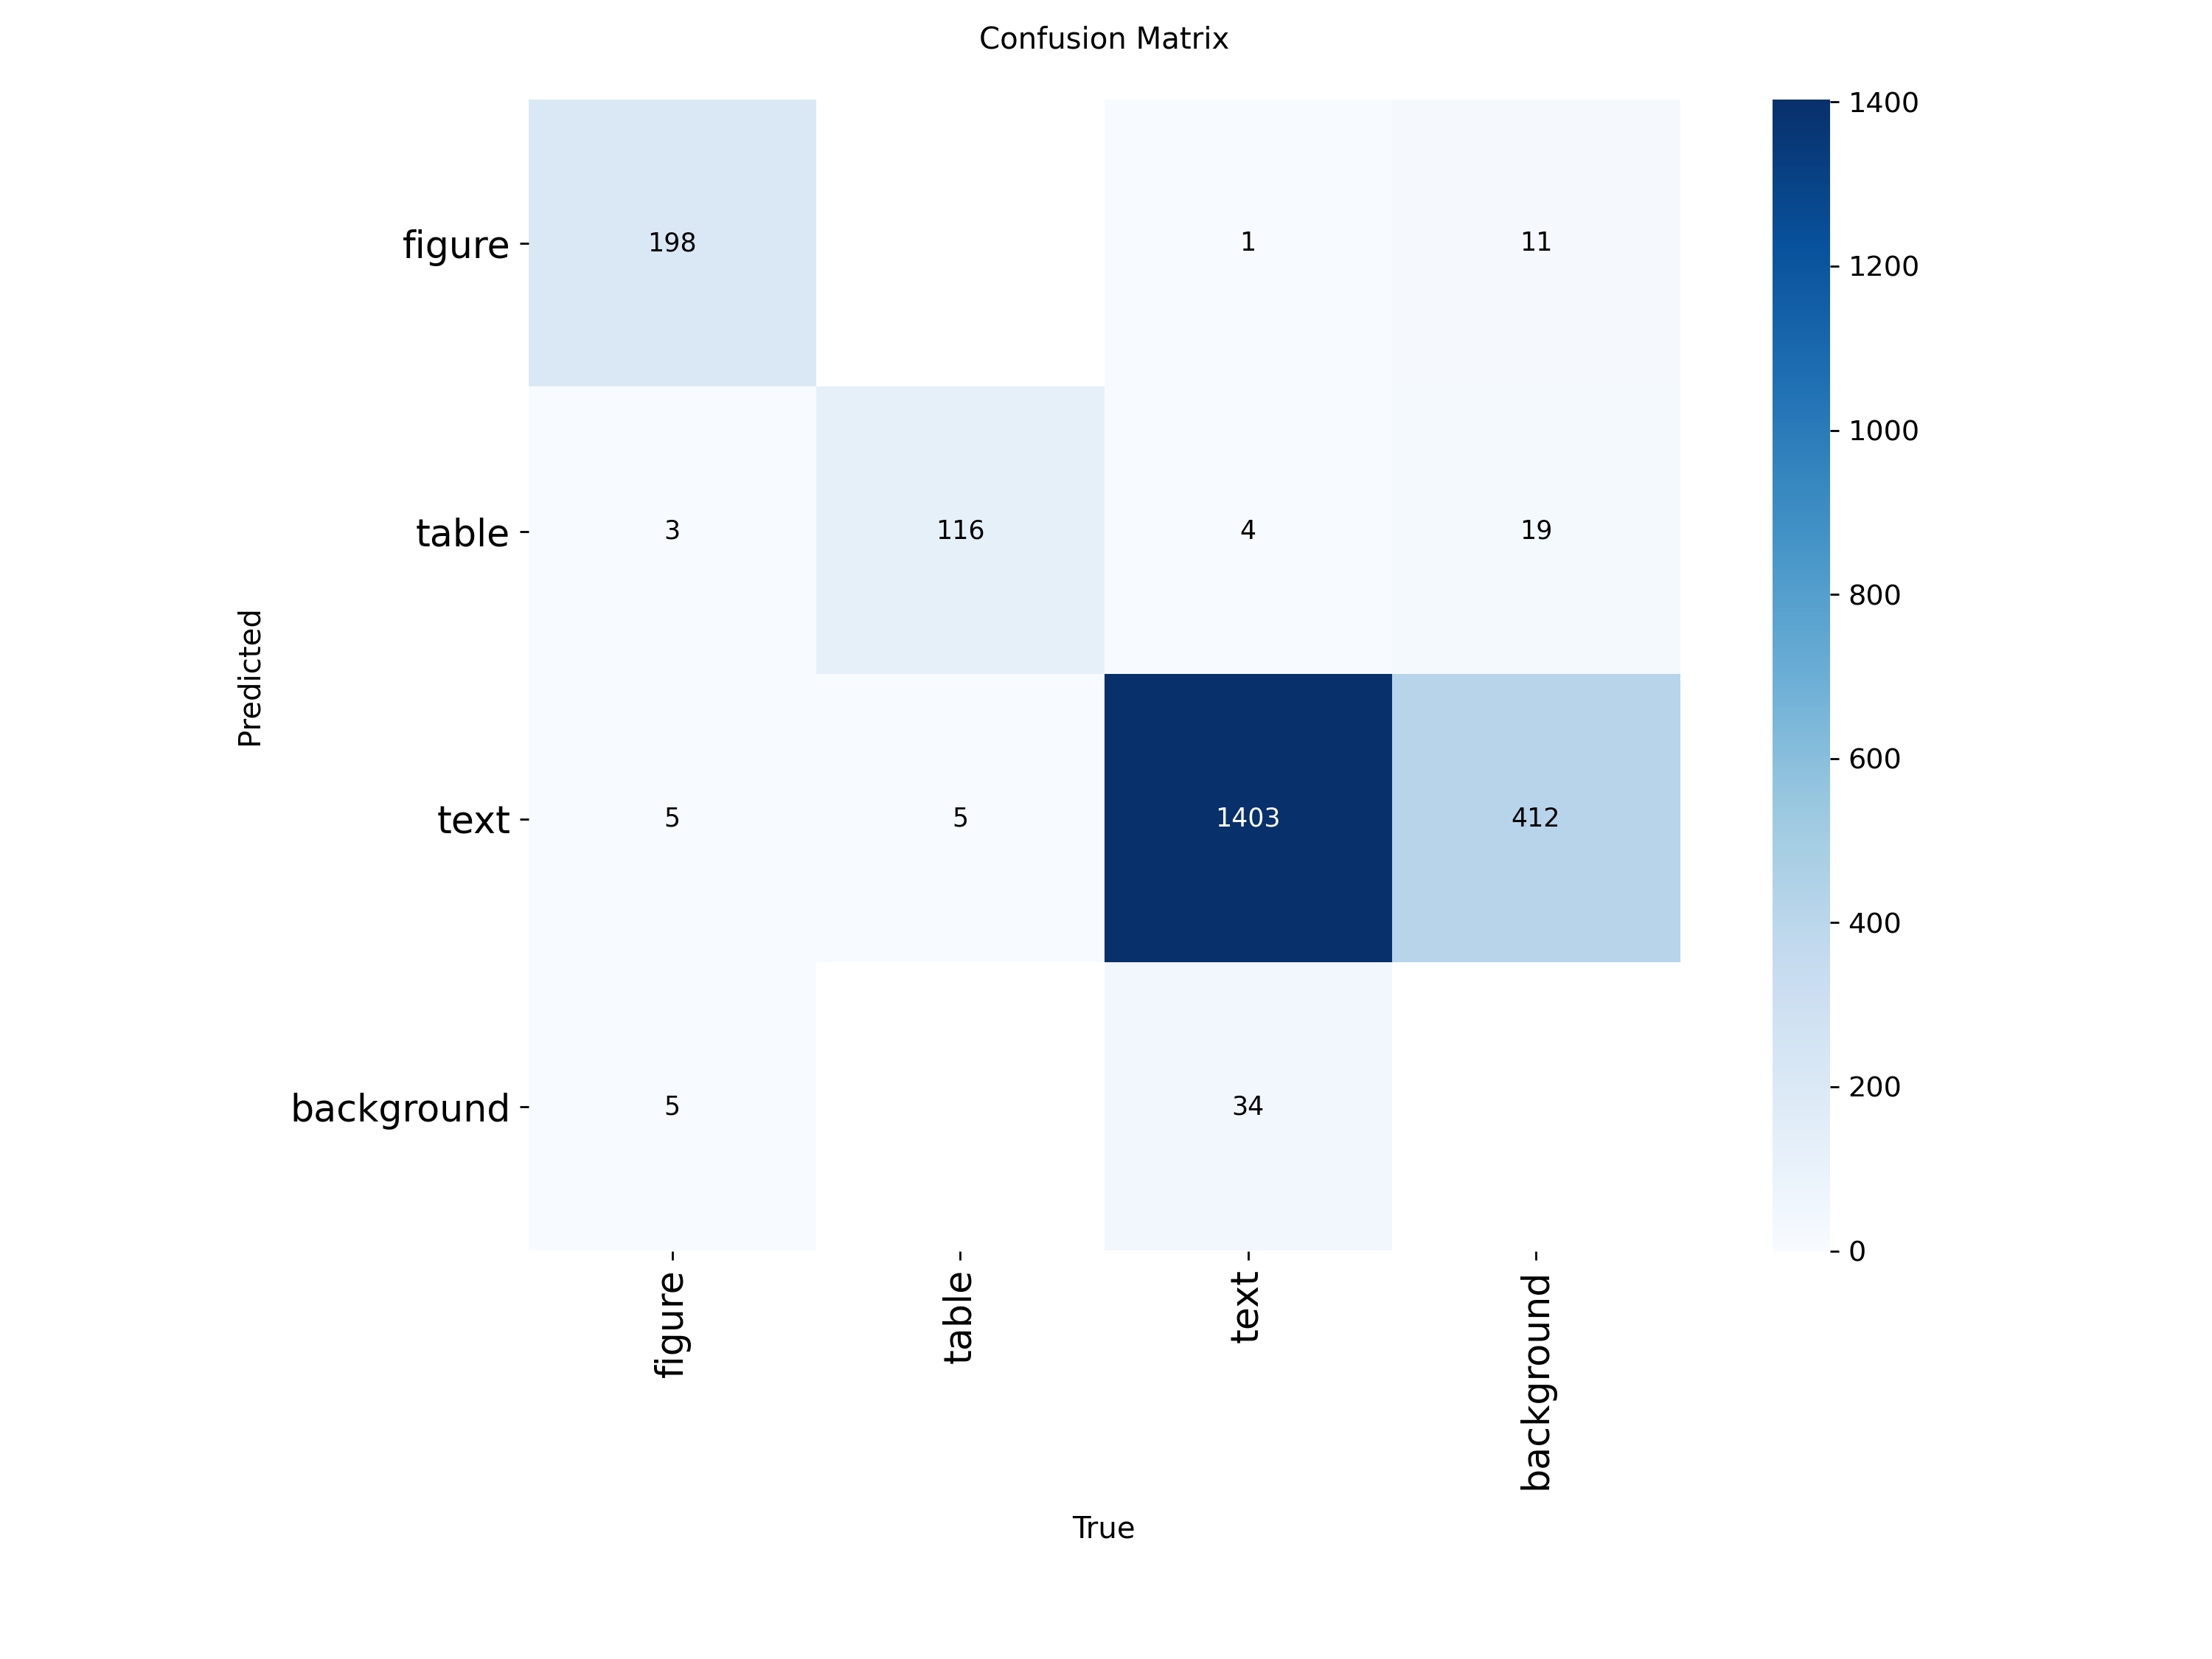

In [ ]:
from IPython.display import Image
Image(filename='/content/datasets/runs/detect/train2/confusion_matrix.png')


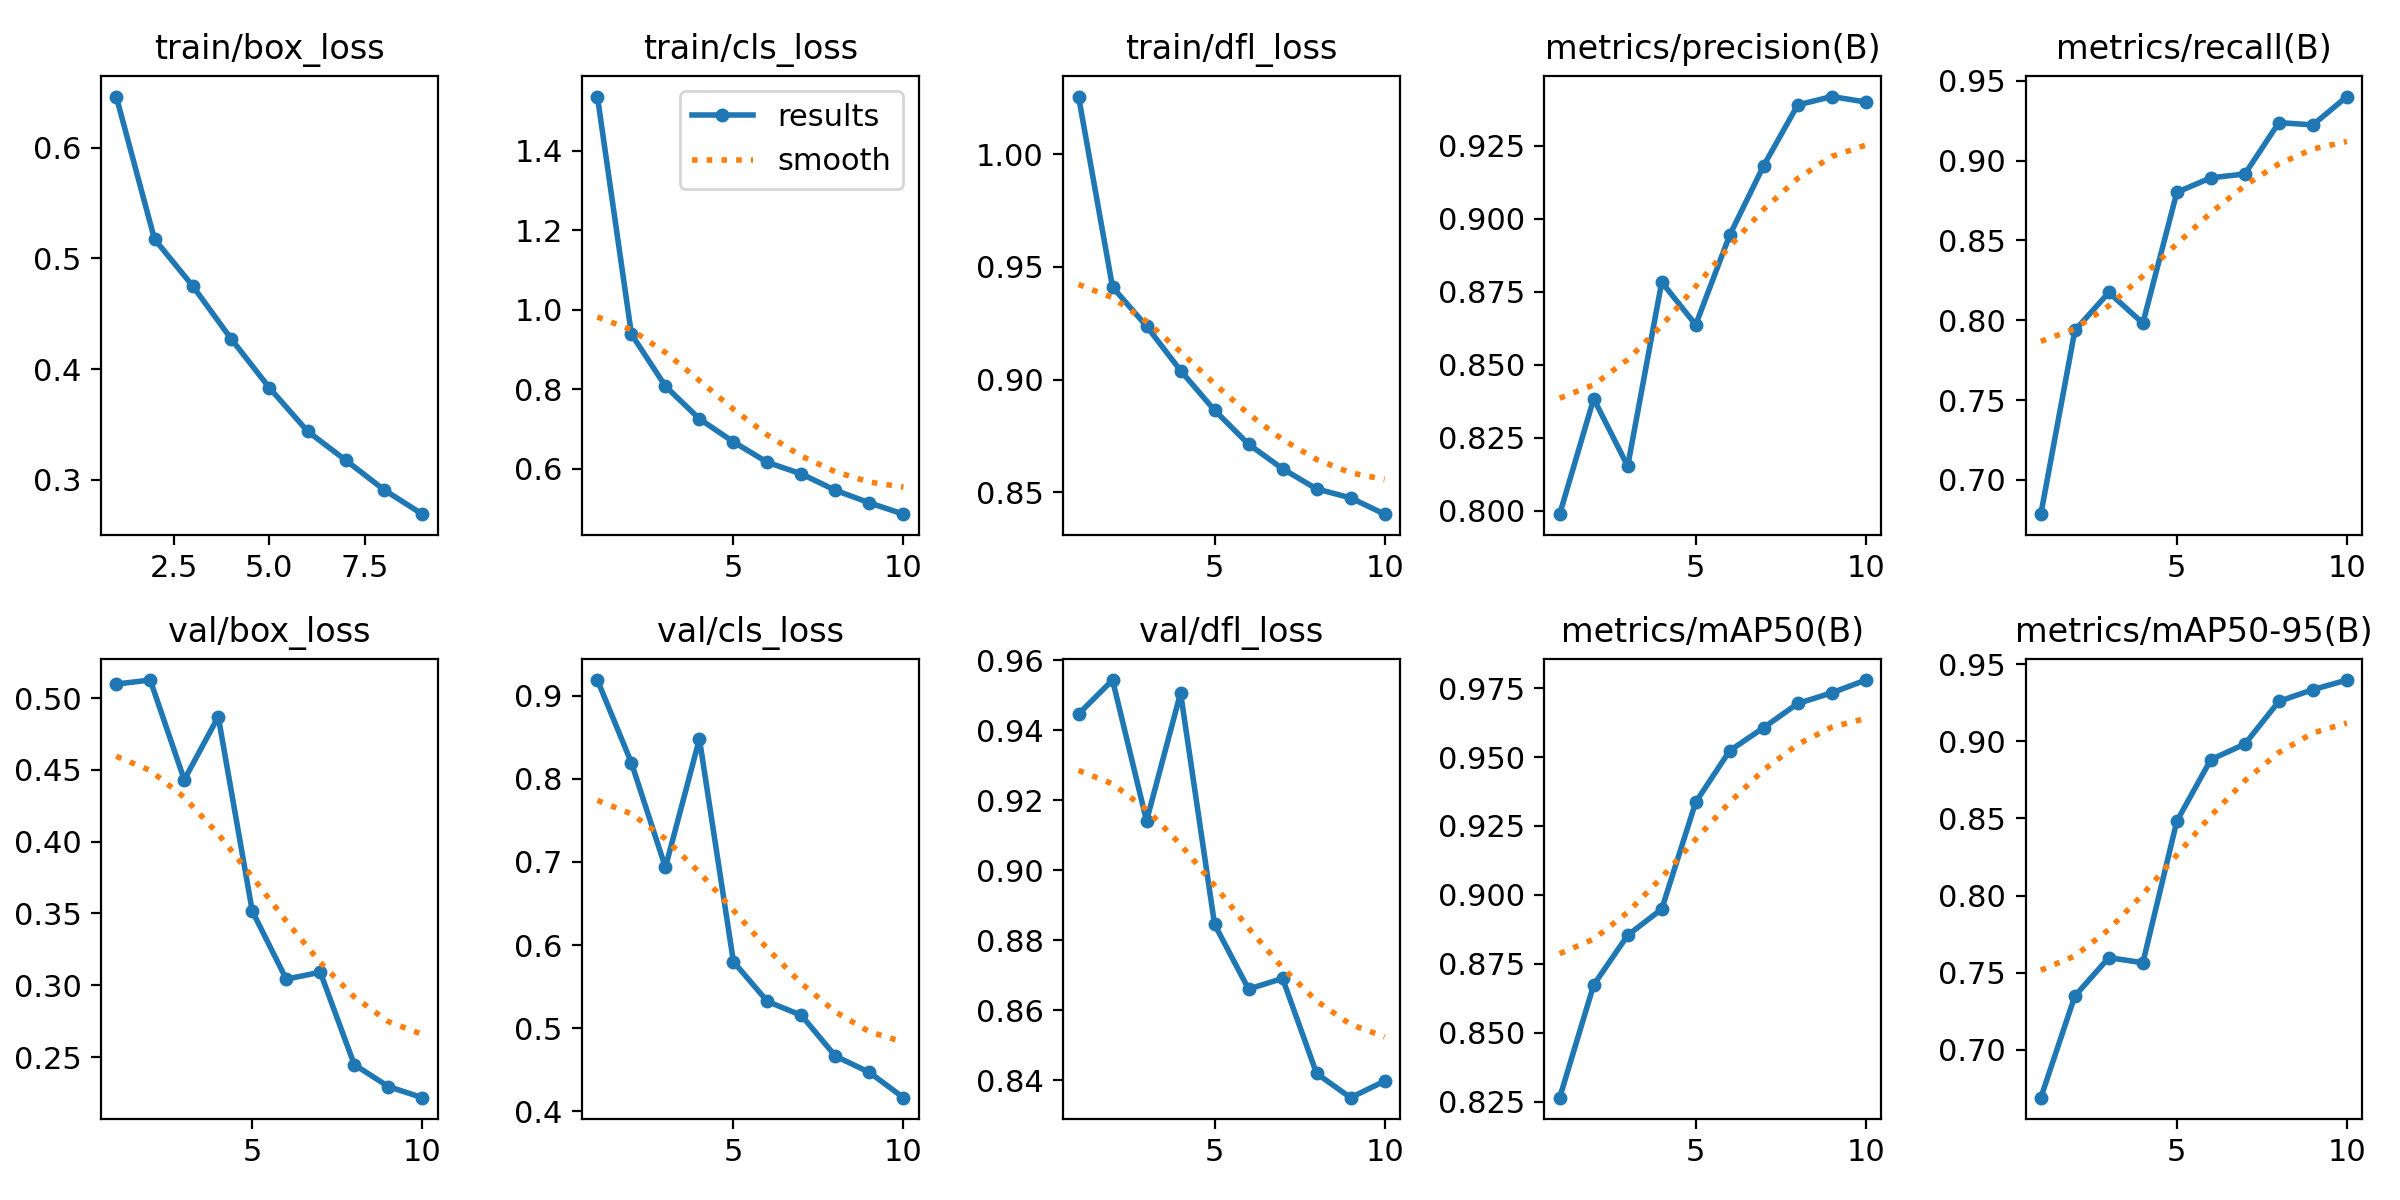

In [ ]:
from IPython.display import Image
Image(filename='/content/datasets/runs/detect/train2/results.png')

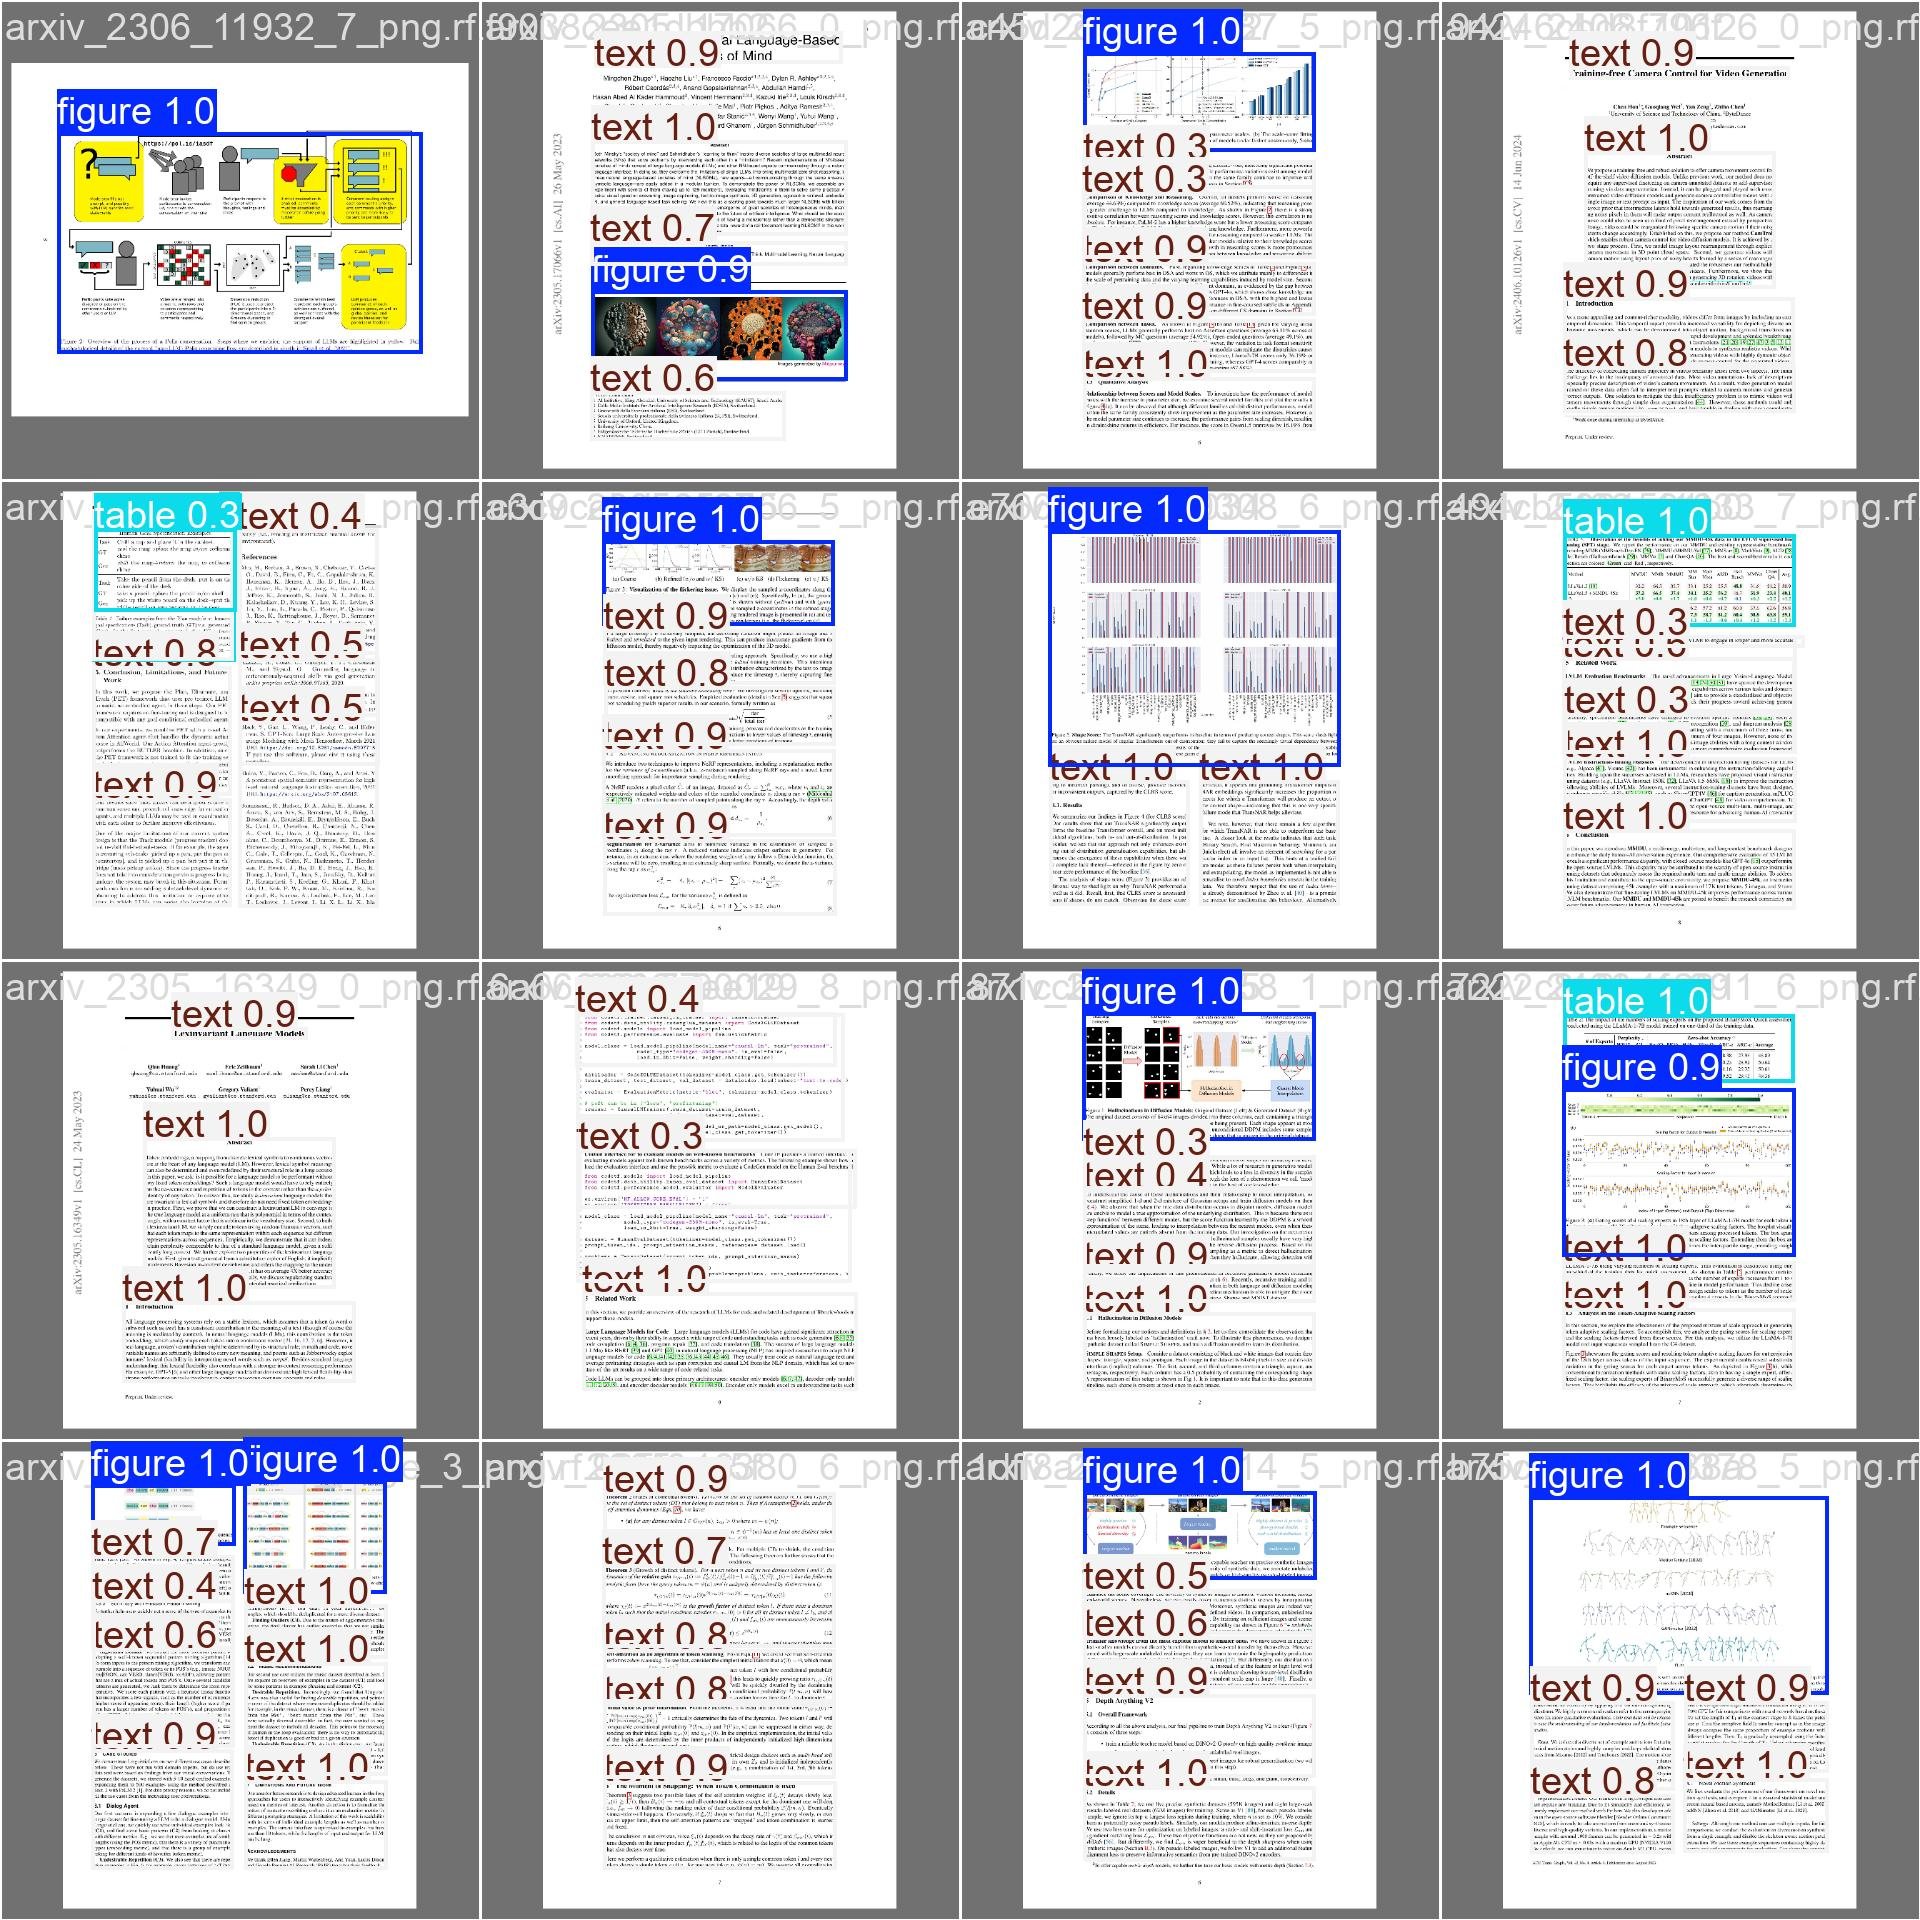

In [35]:
from IPython.display import Image
Image(filename='/content/datasets/runs/detect/train2/val_batch0_pred.jpg', width=600 )

In [37]:
!yolo task=detect mode=val model=/content/datasets/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1815.0±635.5 MB/s, size: 394.4 KB)
val: Scanning /content/datasets/TFT-ID-1/valid/labels.cache... 369 images, 2 backgrounds, 0 corrupt: 100% 369/369 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:07<00:00,  3.11it/s]
                   all        369       1774      0.949      0.936      0.978       0.94
                figure        166        211       0.98      0.948      0.987      0.963
                 table         90        121       0.94      0.967      0.983      0.965
                  text        361       1442      0.927      0.893      0.965      0.892
Speed: 0.9ms preprocess, 5.2ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https

# Checking on new unseen dataset

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/datasets/runs/detect/train2/weights/best.pt')

In [ ]:
results = model.predict(source='/content/Screenshot 2025-07-04 183416.png', save=True, imgsz=640)



image 1/1 /content/Screenshot 2025-07-04 183416.png: 640x512 7 texts, 46.1ms
Speed: 3.0ms preprocess, 46.1ms inference, 155.2ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


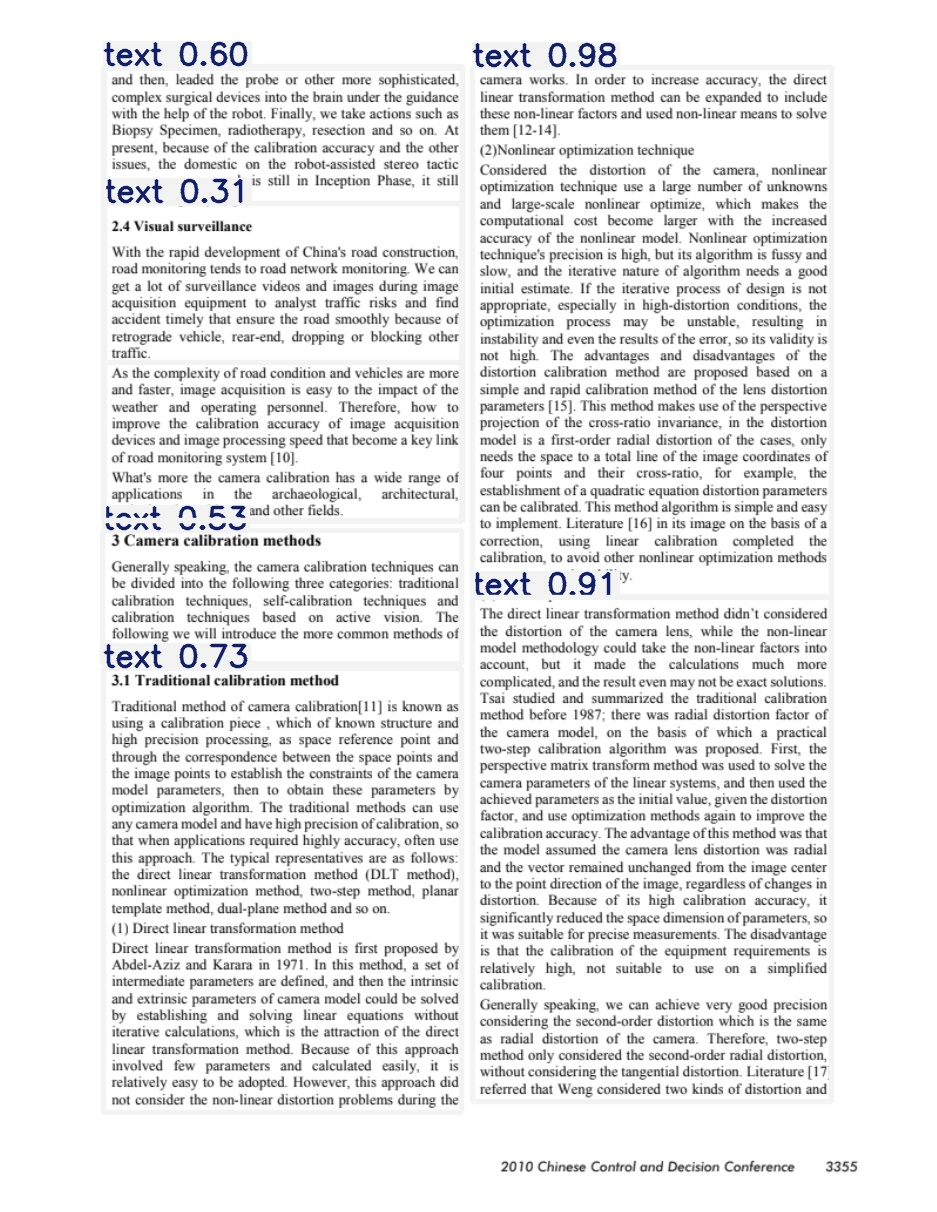

In [ ]:
from IPython.display import Image
Image(filename='/content/datasets/runs/detect/predict/Screenshot 2025-07-04 183416.jpg')